In [1]:
from sympy import *
import numpy as np
Vc, b,h, rake_angle,friction_angle = symbols('V_c b h alpha_r beta_a', real=True)

objective=(0.5*(-(Vc*h*b))
            +0.5*(b*h*((cos(friction_angle-rake_angle))/(
                sin(pi/4-(friction_angle-rake_angle))*cos(pi/4-(friction_angle-rake_angle)+friction_angle-rake_angle)
                ))*sin(rake_angle))
            )

objective

c:\Users\99823827\Anaconda3\envs\Dissertacao_nightly\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\99823827\Anaconda3\envs\Dissertacao_nightly\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\99823827\Anaconda3\envs\Dissertacao_nightly\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


-0.5*V_c*b*h + 0.5*sqrt(2)*b*h*sin(alpha_r)*cos(alpha_r - beta_a)/sin(alpha_r - beta_a + pi/4)

In [4]:
(b*h*((cos(friction_angle-rake_angle))/(
                sin(pi/4-(friction_angle-rake_angle))*cos(pi/4-(friction_angle-rake_angle)+friction_angle-rake_angle)
                ))*sin(rake_angle))

sqrt(2)*b*h*sin(alpha_r)*cos(alpha_r - beta_a)/sin(alpha_r - beta_a + pi/4)

In [2]:
simplify(objective)

0.5*b*h*(-V_c + sqrt(2)*sin(alpha_r)*cos(alpha_r - beta_a)/cos(-alpha_r + beta_a + pi/4))

In [3]:
Pmax,shear_stress=symbols("P_max tau_s")
constrain=Eq(b*h*shear_stress*((cos(friction_angle-rake_angle))/(
                sin(pi/4-(friction_angle-rake_angle))*cos(pi/4-(friction_angle-rake_angle)+friction_angle-rake_angle)
                )),Pmax
)
constrain

Eq(sqrt(2)*b*h*tau_s*cos(alpha_r - beta_a)/sin(alpha_r - beta_a + pi/4), P_max)

Plot da curva objetivo avalizando sobre o parâmetro do ângulo de saída

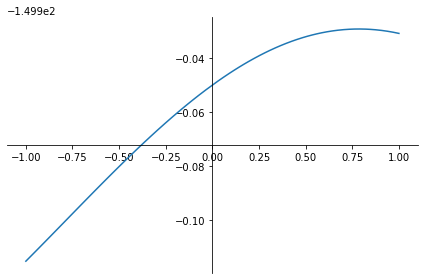

In [4]:
from sympy.plotting import plot

Plot_objective=(0.5*(-(3000*0.5*0.2))
            +0.5*(0.2*0.5*((cos(0.785398-rake_angle))/(
                sin(pi/4-(0.785398-rake_angle))*cos(pi/4-(0.785398-rake_angle)+0.785398-rake_angle)
                ))*sin(rake_angle))
            )

p1=plot_parametric(rake_angle,Plot_objective,(rake_angle, -1, 1))

Plot da curva objetivo avalizando sobre o parâmetro da Velocidade de corte

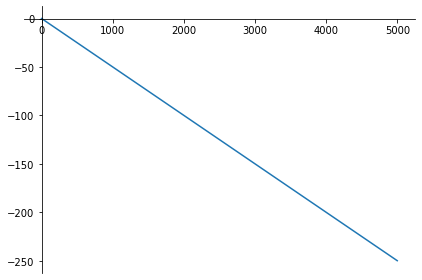

In [5]:
Plot_objective=(0.5*(-(Vc*0.5*0.2))
            +0.5*(0.2*0.5*((cos(0.785398-0.4))/(
                sin(pi/4-(0.785398-0.4))*cos(pi/4-(0.785398-0.4)+0.785398-0.4)
                ))*sin(0.4))
            )
p1=plot_parametric(Vc,Plot_objective,(Vc, 0, 5000))

Plot da curva objetivo avalizando sobre o parâmetro da espessura do cavaco antes da deformação

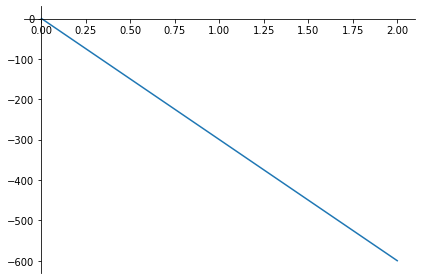

In [6]:
Plot_objective=(0.5*(-(3000*h*0.2))
            +0.5*(0.2*h*((cos(0.785398-0.4))/(
                sin(pi/4-(0.785398-0.4))*cos(pi/4-(0.785398-0.4)+0.785398-0.4)
                ))*sin(0.4))
            )
p1=plot_parametric(h,Plot_objective,(h, 0, 2))

Plot da curva objetivo avalizando sobre o parâmetro de profundidade de corte

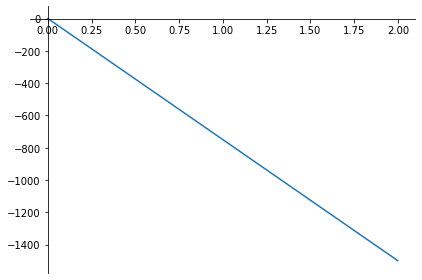

In [7]:
Plot_objective=(0.5*(-(3000*0.5*b))
            +0.5*(b*0.5*((cos(0.785398-0.4))/(
                sin(pi/4-(0.785398-0.4))*cos(pi/4-(0.785398-0.4)+0.785398-0.4)
                ))*sin(0.4))
            )
p1=plot_parametric(b,Plot_objective,(b, 0, 2))

Plot da curva objetivo avalizando sobre o parâmetro do ângulo de atrito

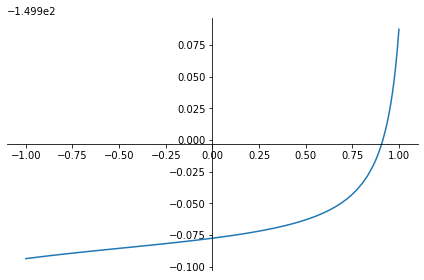

In [8]:
from sympy.plotting import plot

Plot_objective=(0.5*(-(3000*0.5*0.2))
            +0.5*(0.2*0.5*((cos(friction_angle-0.3))/(
                sin(pi/4-(friction_angle-0.3))*cos(pi/4-(friction_angle-0.3)+friction_angle-0.3)
                ))*sin(0.3))
            )
p1=plot_parametric(friction_angle,Plot_objective,(friction_angle, -1, 1))

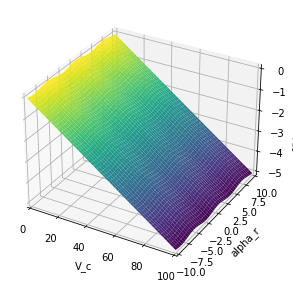

In [9]:
from sympy.plotting import plot3d

Plot_objective=(0.5*(-(Vc*0.5*0.2))
            +0.5*(0.2*0.5*((cos(0.785398-rake_angle))/(
                sin(pi/4-(0.785398-rake_angle))*cos(pi/4-(0.785398-rake_angle)+0.785398-rake_angle)
                ))*sin(rake_angle))
            )
plot3d((Plot_objective, (Vc, 0, 100), (rake_angle, -10, 10)),)

# Problema é convexo?

Avaliando o espaço de variáveis permitido, o problema é convex pois é um problema linear em 3 das variáveis de projeto (Vc, b e h) e para o ângulo de saída o problema é convexo pois o espaço de permitido varia de -15° -> 15° (~ -0,26 radianos -> 0,26 radianos) o que conforme o gráfico mostra tem um ponto bem definido de máximo e o mínimo fica na fronteira do espaço permitido


## ToDo:
- Verificar se o problema é convexo

Jacobian

In [10]:
d_fo_d_rake_angle=diff(objective,rake_angle)
d_fo_d_Vc=diff(objective,Vc)
d_fo_d_h=diff(objective,h)
d_fo_d_b=diff(objective,b)

Matrix([d_fo_d_rake_angle,d_fo_d_Vc,d_fo_d_b,d_fo_d_h])

Matrix([
[-0.5*sqrt(2)*b*h*sin(alpha_r)*sin(alpha_r - beta_a)/sin(alpha_r - beta_a + pi/4) - 0.5*sqrt(2)*b*h*sin(alpha_r)*cos(alpha_r - beta_a)*cos(alpha_r - beta_a + pi/4)/sin(alpha_r - beta_a + pi/4)**2 + 0.5*sqrt(2)*b*h*cos(alpha_r)*cos(alpha_r - beta_a)/sin(alpha_r - beta_a + pi/4)],
[                                                                                                                                                                                                                                                                            -0.5*b*h],
[                                                                                                                                                                                          -0.5*V_c*h + 0.5*sqrt(2)*h*sin(alpha_r)*cos(alpha_r - beta_a)/sin(alpha_r - beta_a + pi/4)],
[                                                                                                                                                      

Hessian

In [11]:
fo_hessian=Matrix([[diff(d_fo_d_rake_angle,rake_angle),diff(d_fo_d_rake_angle,Vc),diff(d_fo_d_rake_angle,b),diff(d_fo_d_rake_angle,h)], #x1
       [diff(d_fo_d_Vc,rake_angle),diff(d_fo_d_Vc,Vc),diff(d_fo_d_Vc,b),diff(d_fo_d_Vc,h)], #x2
       [diff(d_fo_d_h,rake_angle),diff(d_fo_d_h,Vc),diff(d_fo_d_h,b),diff(d_fo_d_h,h)], #x3
       [diff(d_fo_d_b,rake_angle),diff(d_fo_d_b,Vc),diff(d_fo_d_b,b),diff(d_fo_d_b,h)] #x4
])
fo_hessian

Matrix([
[1.0*sqrt(2)*b*h*sin(alpha_r)*sin(alpha_r - beta_a)*cos(alpha_r - beta_a + pi/4)/sin(alpha_r - beta_a + pi/4)**2 - 0.5*sqrt(2)*b*h*sin(alpha_r)*cos(alpha_r - beta_a)/sin(alpha_r - beta_a + pi/4) + 1.0*sqrt(2)*b*h*sin(alpha_r)*cos(alpha_r - beta_a)*cos(alpha_r - beta_a + pi/4)**2/sin(alpha_r - beta_a + pi/4)**3 - 1.0*sqrt(2)*b*h*sin(alpha_r - beta_a)*cos(alpha_r)/sin(alpha_r - beta_a + pi/4) - 1.0*sqrt(2)*b*h*cos(alpha_r)*cos(alpha_r - beta_a)*cos(alpha_r - beta_a + pi/4)/sin(alpha_r - beta_a + pi/4)**2,      0, -0.5*sqrt(2)*h*sin(alpha_r)*sin(alpha_r - beta_a)/sin(alpha_r - beta_a + pi/4) - 0.5*sqrt(2)*h*sin(alpha_r)*cos(alpha_r - beta_a)*cos(alpha_r - beta_a + pi/4)/sin(alpha_r - beta_a + pi/4)**2 + 0.5*sqrt(2)*h*cos(alpha_r)*cos(alpha_r - beta_a)/sin(alpha_r - beta_a + pi/4), -0.5*sqrt(2)*b*sin(alpha_r)*sin(alpha_r - beta_a)/sin(alpha_r - beta_a + pi/4) - 0.5*sqrt(2)*b*sin(alpha_r)*cos(alpha_r - beta_a)*cos(alpha_r - beta_a + pi/4)/sin(alpha_r - beta_a + pi/4)**2 + 0.5*sqrt(

In [12]:
if False:
    fo_hessian.is_positive_definite
    fo_hessian.is_positive_semidefinite
    fo_hessian.is_indefinite
    fo_hessian.is_negative_definite
    fo_hessian.is_negative_semidefinite

# Otimização da força de corte

In [27]:
from scipy.optimize import minimize

degree_to_radian=lambda x: x*np.pi/180
radians_to_degree=lambda x: x*180/np.pi

def objective_func(x):
    b,h,rake_angle=x
    friction_angle=degree_to_radian(30)
    return (b*h*((np.cos(friction_angle-rake_angle))/(
                np.sin(np.pi/4-(friction_angle-rake_angle))*np.cos(np.pi/4-(friction_angle-rake_angle)+friction_angle-rake_angle)
                ))*np.sin(rake_angle))

bounds=[(0.2,0.5),(0.5,1),(degree_to_radian(-15),degree_to_radian(15))]

output=minimize(objective_func,x0=[0.3,0.7,0],method="Powell",bounds=bounds)
output

   direc: array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
     fun: -2309.931966182134
 message: 'Optimization terminated successfully.'
    nfev: 114
     nit: 2
  status: 0
 success: True
       x: array([ 0.49994932,  0.9999468 , -0.26174338])

In [28]:
for param,value in zip(["b","h","rake_angle"],output["x"]):
    if param == "rake_angle":
        value=radians_to_degree(value)
    print("{} : {:.4f}".format(param,value))

b : 0.4999
h : 0.9999
rake_angle : -14.9968


# Otimização de MRR com redução da proxy de temperatura com restrições

In [15]:
from scipy.optimize import minimize

degree_to_radian=lambda x: x*np.pi/180
radians_to_degree=lambda x: x*180/np.pi

def objective_func(x):
    Vc,b,h,rake_angle=x
    friction_angle=degree_to_radian(30)
    return (0.5*(-(Vc*h*b))
            +0.5*(b*h*((np.cos(friction_angle-rake_angle))/(
                np.sin(np.pi/4-(friction_angle-rake_angle))*np.cos(np.pi/4-(friction_angle-rake_angle)+friction_angle-rake_angle)
                ))*np.sin(rake_angle))
            )

bounds=[(3000,5000),(0.2,0.5),(0.5,1),(degree_to_radian(-15),degree_to_radian(15))]

def constraint_func(x):
    Vc,b,h,rake_angle=x
    friction_angle=degree_to_radian(30)
    tension=650
    Pmax=450000
    return -(b*h*(tension*(np.cos(friction_angle-rake_angle))/(
                np.sin(np.pi/4-(friction_angle-rake_angle))*np.cos(np.pi/4-(friction_angle-rake_angle)+friction_angle-rake_angle)
                -Pmax)))


output=minimize(objective_func,x0=[4500,0.3,0.7,0],method="Powell",bounds=bounds,constraints={'type': 'ineq', 'fun': constraint_func})
output

   direc: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  4.31616302e-10,  6.47556284e-10,
        -7.19580208e-05]])
     fun: -18012184.62681014
 message: 'Optimization terminated successfully.'
    nfev: 511
     nit: 4
  status: 0
 success: True
       x: array([ 4.99999994e+03,  4.99949323e-01,  9.99946798e-01, -2.61799384e-01])

In [22]:
for param,value in zip(["Vc","b","h","rake_angle"],output["x"]):
    if param == "rake_angle":
        value=radians_to_degree(value)
    print("{} : {:.4f}".format(param,value))

Vc : 4999.9999
b : 0.4999
h : 0.9999
rake_angle : -15.0000
